In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [70]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\train.csv",usecols=['Age','Fare','Survived'])

In [71]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [72]:
df.dropna(inplace=True)

In [73]:
X= df.drop('Survived',axis=1)
y = df['Survived']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=128)

In [75]:
X_train.head()

,Age,Fare
416,34.0,32.5000
661,40.0,7.2250
754,48.0,65.0000
748,19.0,53.1000
370,25.0,55.4417


In [76]:
clf = DecisionTreeClassifier()

In [77]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred = clf.predict(X_test)

In [79]:
print("accuracy score is ",accuracy_score(y_test,y_pred))

accuracy score is  0.586046511627907


In [80]:
print(cross_val_score(clf,X,y,scoring='accuracy').mean())

0.612065399389343


In [81]:
kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [82]:
trf= ColumnTransformer(transformers=[
    ('trf1',kbin_age,[0]),
    ('trf2',kbin_fare,[1])
])

In [83]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [84]:
trf.named_transformers_['trf1'].n_bins_

array([10])

In [85]:
trf.named_transformers_['trf2'].bin_edges_

array([array([  0.     ,   7.75   ,   7.91332,   8.6625 ,  12.2775 ,  14.5    ,
               23.     ,  27.45   ,  39.     ,  77.42166, 512.3292 ])          ],
      dtype=object)

In [86]:
output = pd.DataFrame({'age': X_train['Age'],'age_trf':X_train_trf[:,0],'Fare': X_train['Fare'],'fare_trf':X_train_trf[:,1]})

In [87]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['trf1'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['trf2'].bin_edges_[0].tolist())

In [88]:
output

,age,age_trf,Fare,fare_trf,age_labels,fare_labels
416,34.0,6.0,32.5000,7.0,"(31.0, 35.0]","(27.45, 39.0]"
661,40.0,8.0,7.2250,0.0,"(35.0, 40.0]","(0.0, 7.75]"
754,48.0,8.0,65.0000,8.0,"(40.0, 50.0]","(39.0, 77.422]"
748,19.0,2.0,53.1000,8.0,"(18.0, 22.0]","(39.0, 77.422]"
370,25.0,4.0,55.4417,8.0,"(22.0, 25.0]","(39.0, 77.422]"
...,...,...,...,...,...,...
148,36.5,7.0,26.0000,6.0,"(35.0, 40.0]","(23.0, 27.45]"
422,29.0,5.0,7.8750,1.0,"(28.0, 31.0]","(7.75, 7.913]"
616,34.0,6.0,14.4000,4.0,"(31.0, 35.0]","(12.278, 14.5]"
106,21.0,2.0,7.6500,0.0,"(18.0, 22.0]","(0.0, 7.75]"


In [89]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_trf,y_train)
y_pred = clf2.predict(X_test_trf)
print(accuracy_score(y_test,y_pred))

0.6744186046511628


In [90]:
X_trf = trf.fit_transform(X)
print(cross_val_score(DecisionTreeClassifier(),X_trf,y,scoring='accuracy').mean())

0.6624642962671131


<Axes: xlabel='Age', ylabel='Count'>

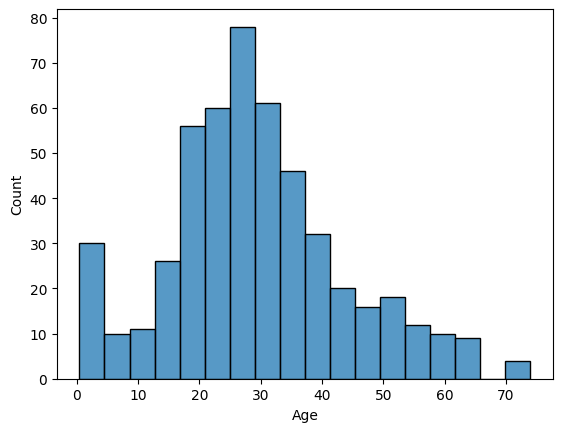

In [91]:
sns.histplot(X_train['Age'])

In [92]:
def discretizer(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')
    kbin_Fare=KBinsDiscretizer(n_bins=bins,strategy=strategy,encode='ordinal')

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_Fare,[1])
    ])
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6344679186228481


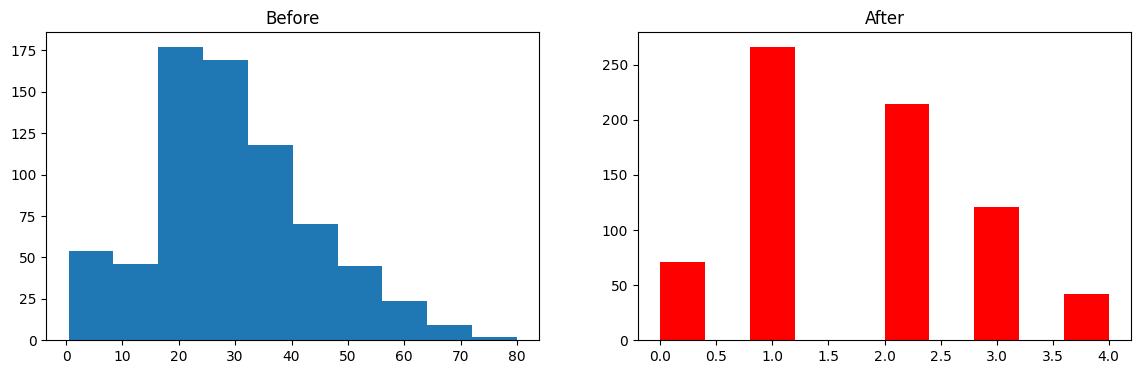

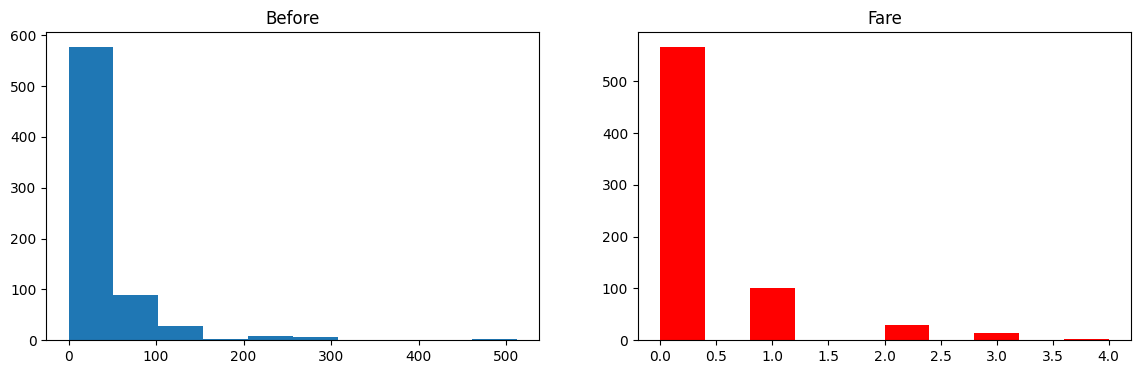

In [96]:
discretizer(5,'kmeans')

In [94]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6317097026604068


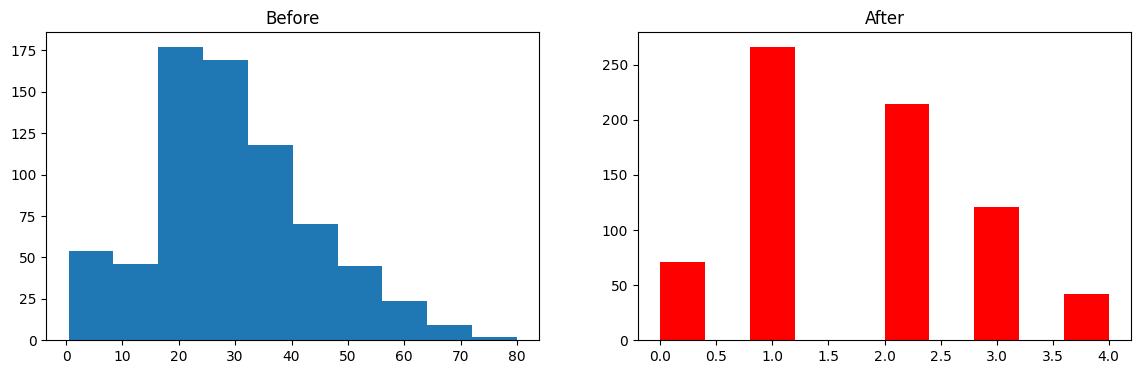

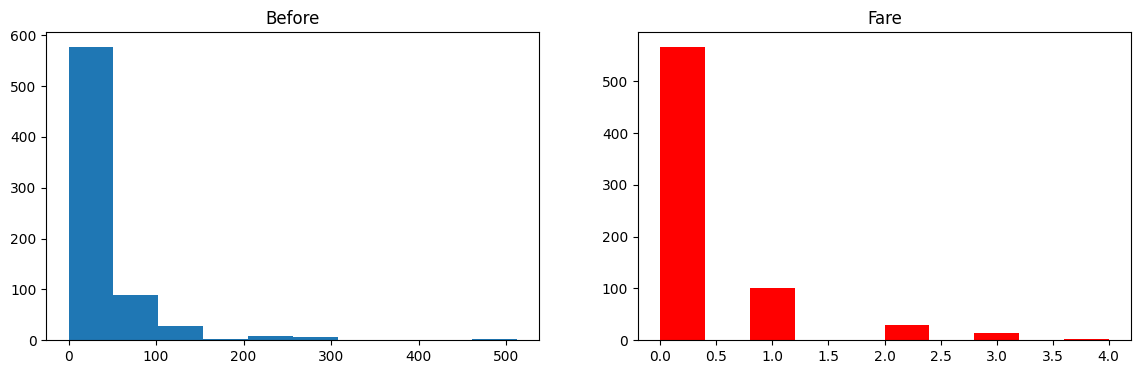

In [95]:
discretize(5,'kmeans')

## 2. Custom or Domain based binning
- based on knowledge
- 0-18 --- teenage
- 18-24 - Adult
- no library